### Simple example of a three axis dataset, linearly separable.

In [1]:
import numpy as np
import pandas as pd

seed=1234
np.random.seed(seed)

trials = 1
n_samples = 300
# Change this to make it unbalanced
proportion = 0.5

y = np.random.binomial(trials, proportion, n_samples)
x1 = np.random.random(n_samples)
x2 = 0.5+(-1+y)*0.20
x3 = (-1+y)*0.80+x1

data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
data

,x1,x2,x3,y
0,0.285878,0.3,-0.514122,0
1,0.986747,0.5,0.986747,1
2,0.431801,0.3,-0.368199,0
3,0.574234,0.5,0.574234,1
4,0.527242,0.5,0.527242,1
...,...,...,...,...
295,0.351571,0.3,-0.448429,0
296,0.442946,0.5,0.442946,1
297,0.579493,0.5,0.579493,1
298,0.617561,0.5,0.617561,1


In [2]:
aux = "balanced"
if proportion != 0.5:
    aux = "unbalanced"

data.to_csv(f"../data/linear_{n_samples}_{aux}.csv", index=False)

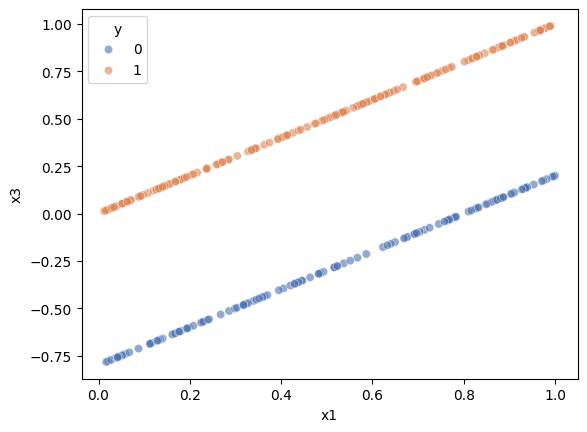

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=data['x1'], y=data['x3'], alpha=0.6, hue=data["y"], palette="deep")
plt.show()

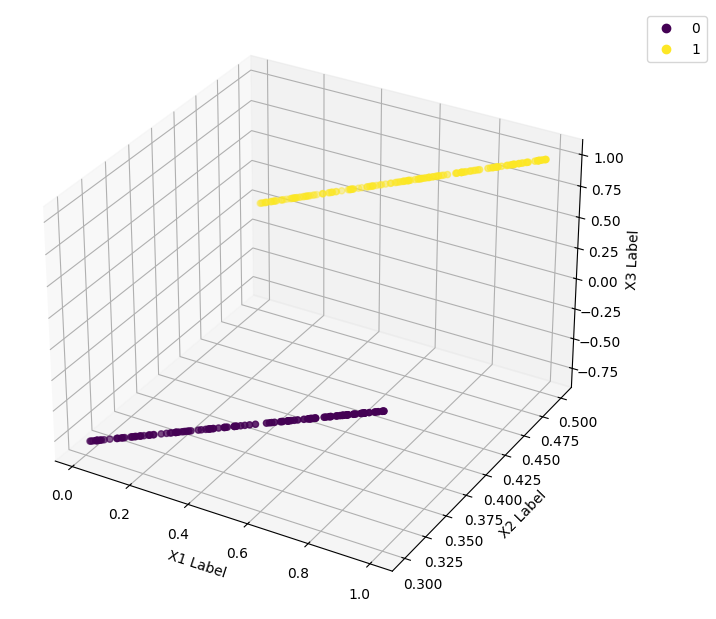

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(data['x1'], data['x2'], data['x3'], c=data['y'])
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('X3 Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

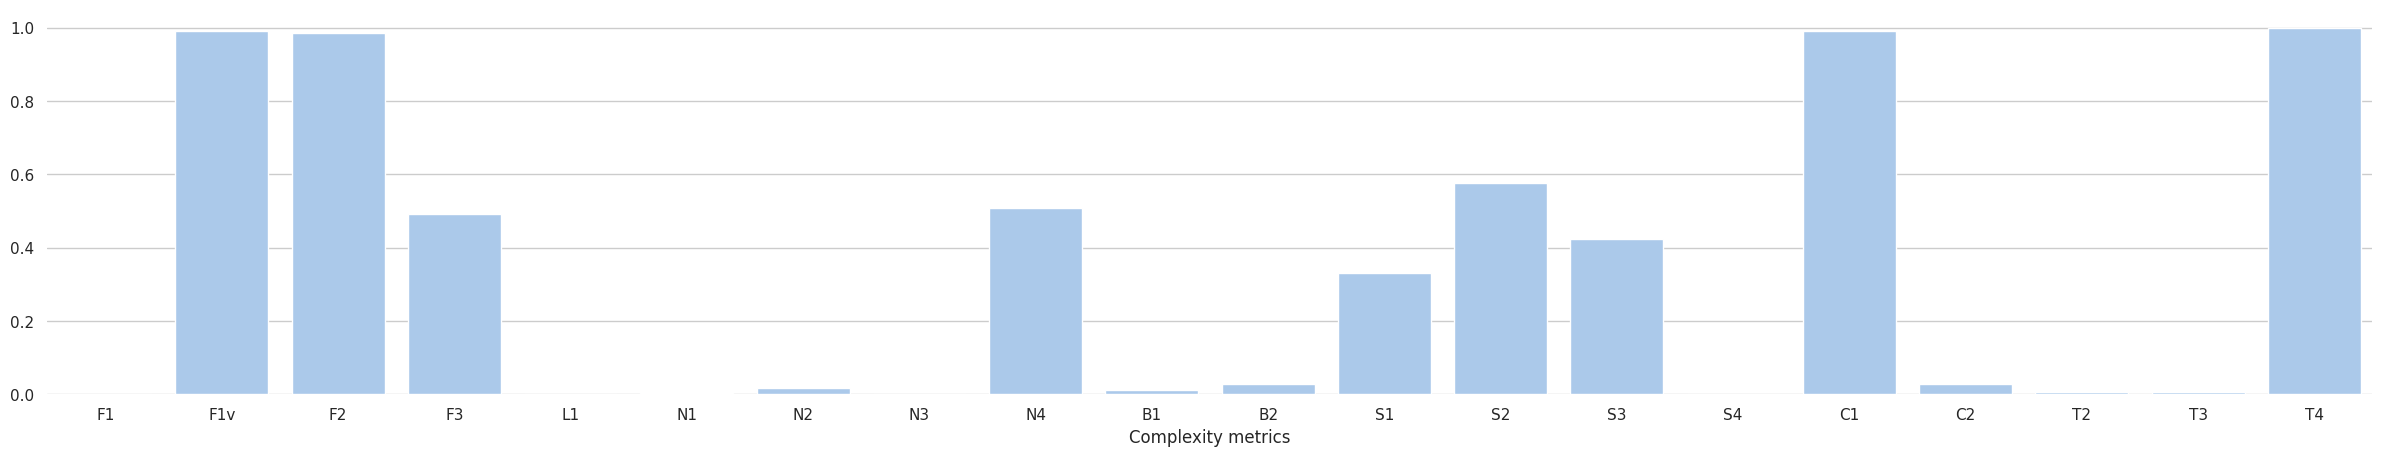

In [5]:
from dcm import ComplexityProfile
from dcm.utils import plot_profile

profile = ComplexityProfile()
profile.fit(data[["x1","x2"]],data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

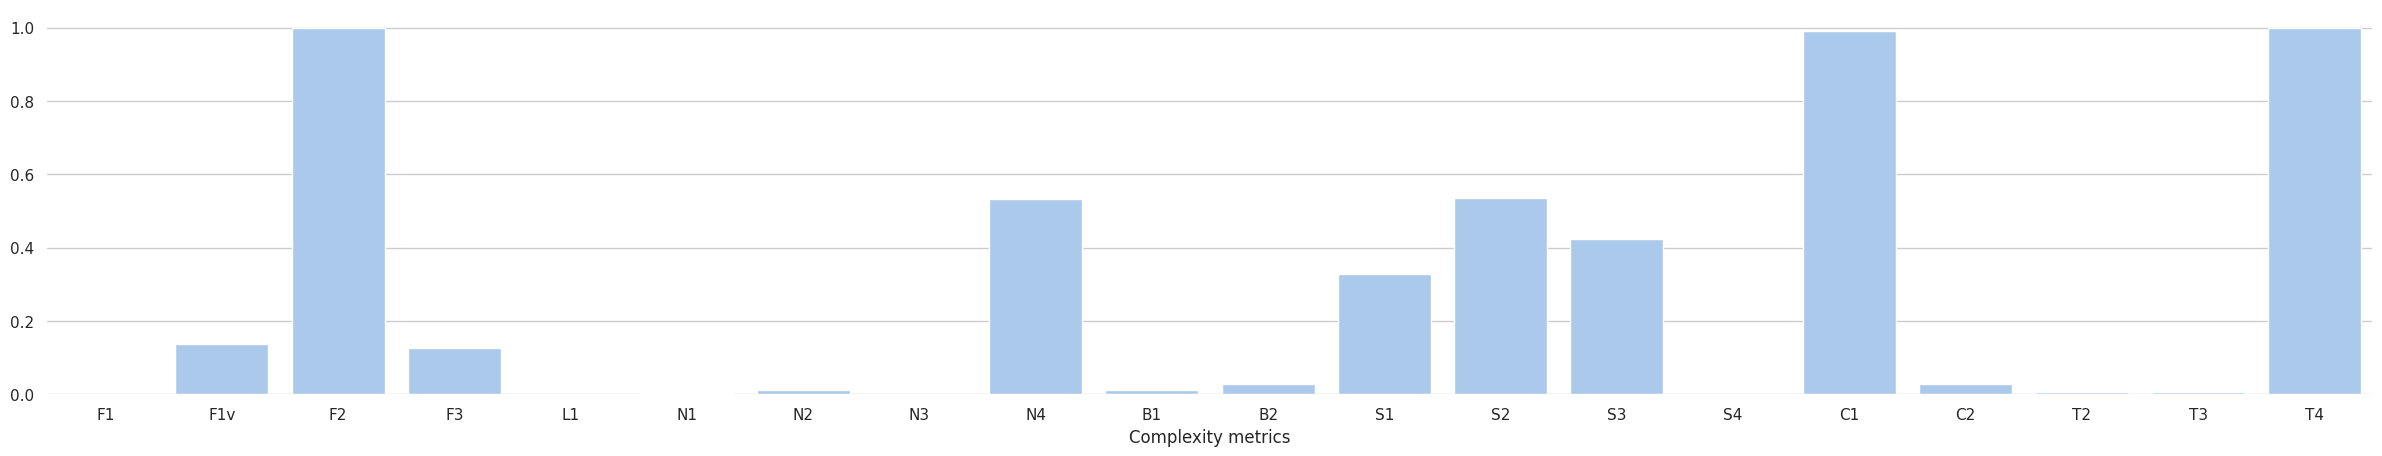

In [6]:
profile = ComplexityProfile()
profile.fit(data[["x2","x3"]],data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

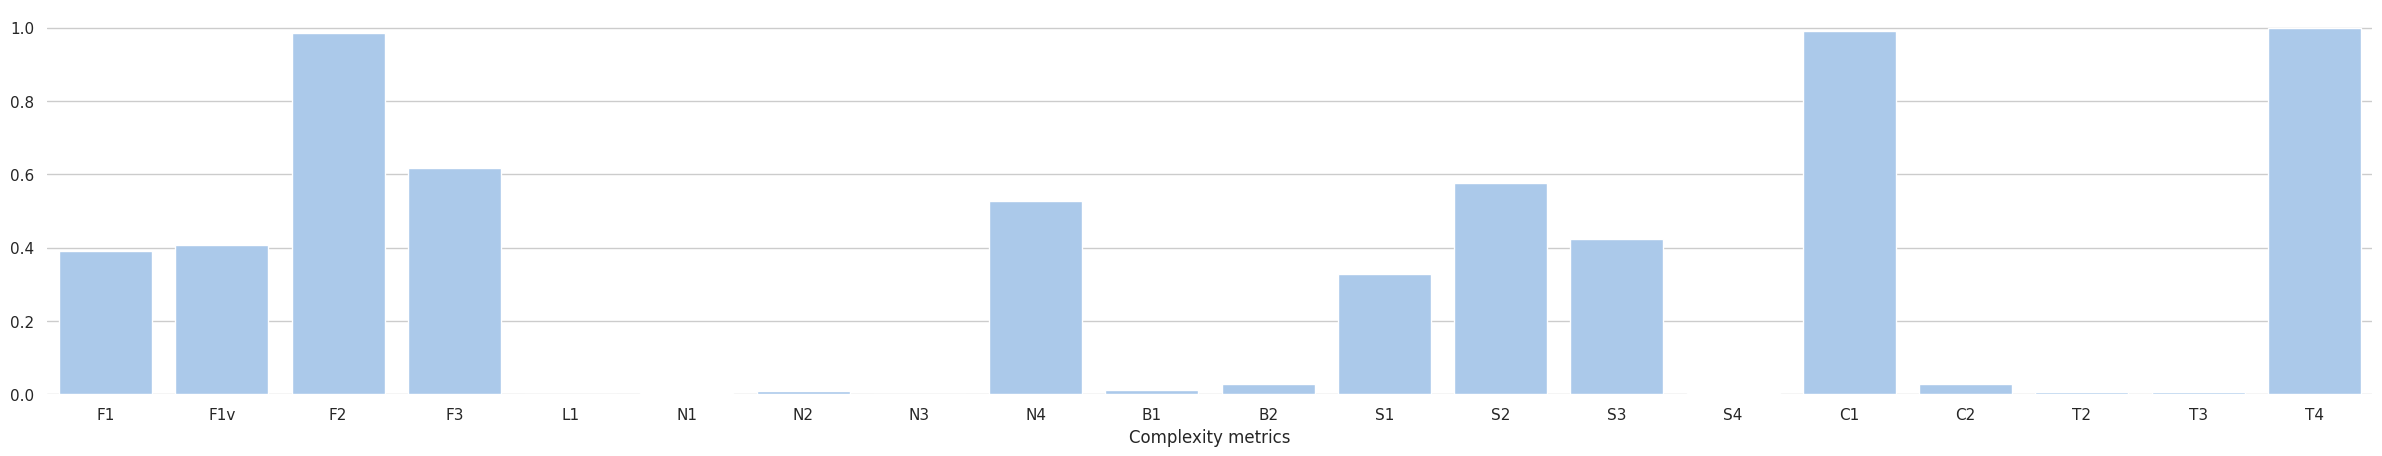

In [7]:
profile = ComplexityProfile()
profile.fit(data[["x1","x3"]],data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

## More fuzzy extra axis

In [8]:
np.random.seed(seed)

x2 = 0.75+y*-1*np.random.normal(0.5, 0.1, n_samples)
x3 = 2*np.random.uniform(0.5, 0.1, n_samples)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
data

,x1,x2,x3,y
0,0.285878,0.750000,0.335803,0
1,0.986747,0.369098,0.404189,1
2,0.431801,0.750000,0.530817,0
3,0.574234,0.281265,0.605706,1
4,0.527242,0.322059,0.610115,1
...,...,...,...,...
295,0.351571,0.750000,0.409412,0
296,0.442946,0.255054,0.701344,1
297,0.579493,0.286401,0.337051,1
298,0.617561,0.405334,0.927808,1


In [9]:
aux = "balanced"
if proportion != 0.5:
    aux = "unbalanced"

data.to_csv(f"../data/fuzzy_{n_samples}_{aux}.csv", index=False)

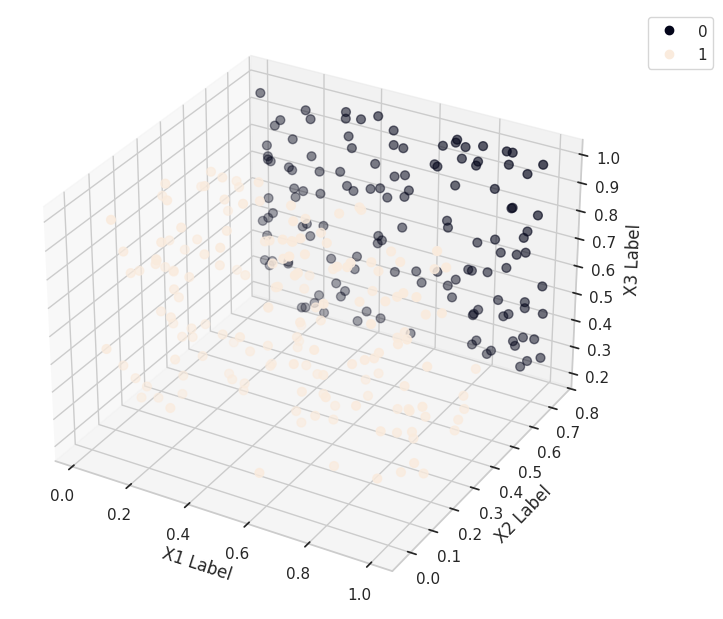

In [10]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(data['x1'], data['x2'], data['x3'], s=40, c=data['y'])
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('X3 Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

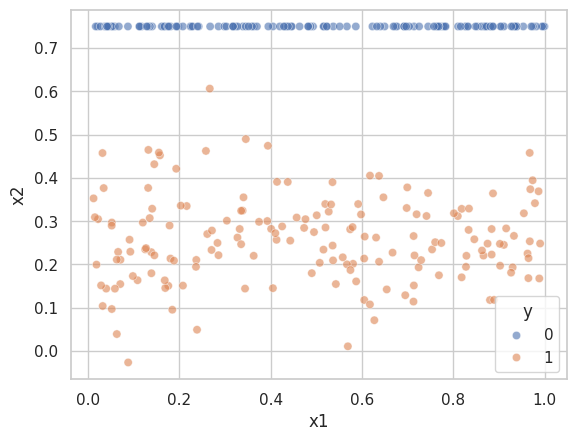

In [11]:
sns.scatterplot(x=data['x1'], y=data['x2'], alpha=0.6, hue=data["y"], palette="deep")
plt.show()

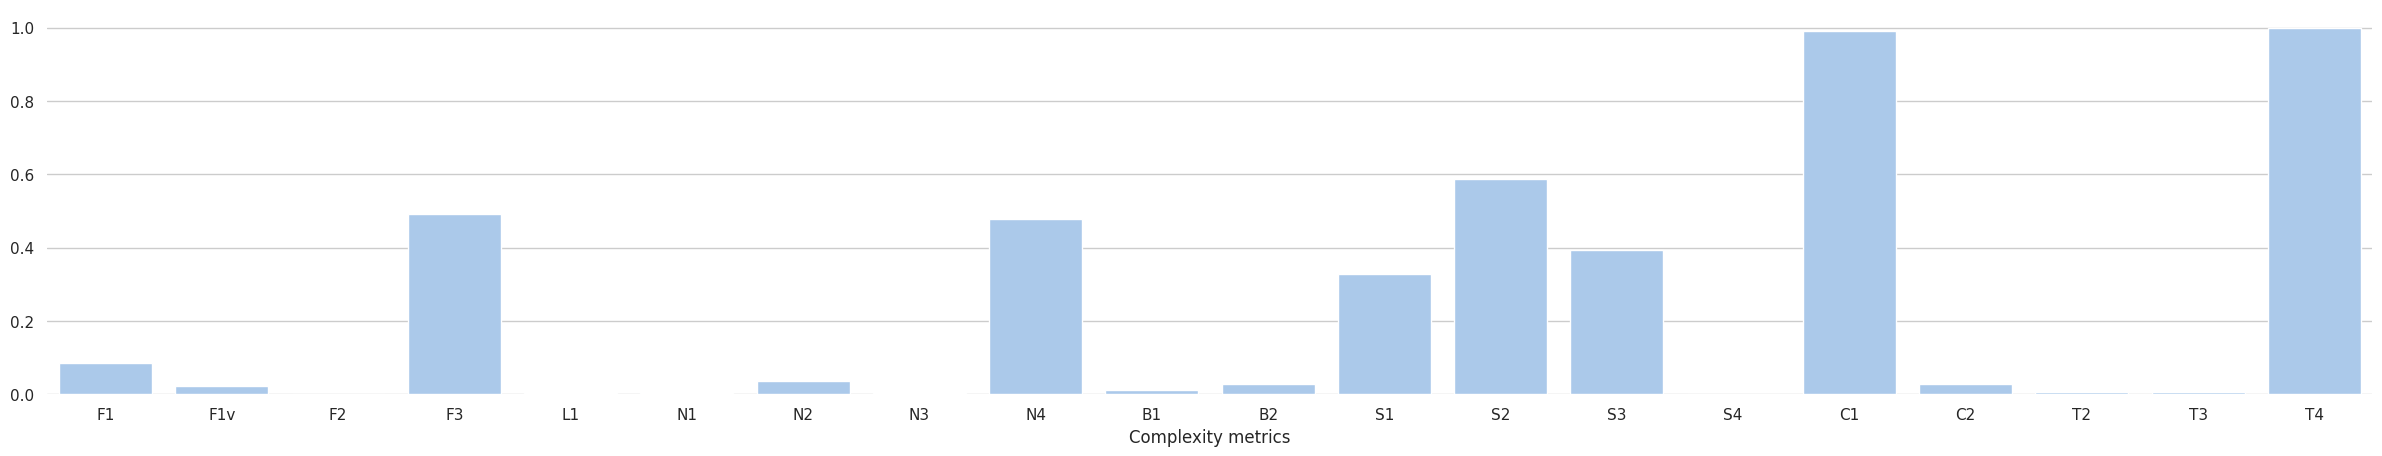

In [12]:
profile = ComplexityProfile()
profile.fit(data[["x1","x2"]],data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

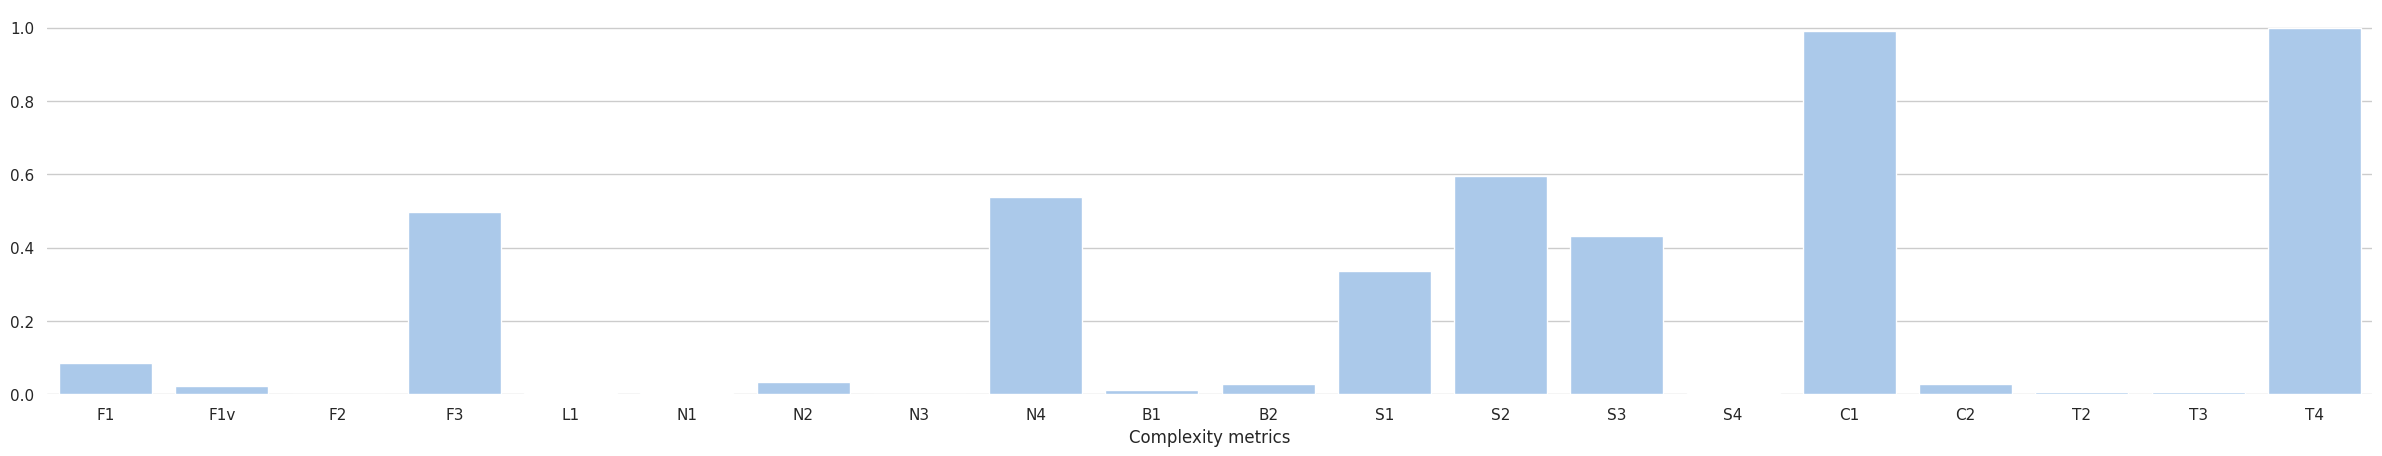

In [13]:
profile = ComplexityProfile()
profile.fit(data[["x2","x3"]],data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

## Blobs

In [14]:
from sklearn.datasets import make_blobs

X_blob, y_blob = make_blobs(
        n_samples=[n_samples, int(n_samples*proportion)],
        n_features=3,
        random_state=seed
    )

x1 = X_blob[:,0]
x2 = X_blob[:,1]
x3 = X_blob[:,2]

y = y_blob

data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
data

,x1,x2,x3,y
0,-6.097733,4.352935,-0.457481,0
1,6.048377,7.705300,-6.319020,1
2,6.401877,5.430090,-7.079006,1
3,5.705858,4.838134,-5.035962,1
4,-3.405767,2.841501,-0.576957,0
...,...,...,...,...
445,-6.992229,2.399907,-1.636715,0
446,-4.738427,3.034934,-1.075148,0
447,-4.806129,1.661070,-1.713463,0
448,-5.217133,3.430313,-1.318054,0


In [15]:
aux = "balanced"
if proportion != 0.5:
    aux = "unbalanced"

data.to_csv(f"../data/blobs_{n_samples}_{aux}.csv", index=False)

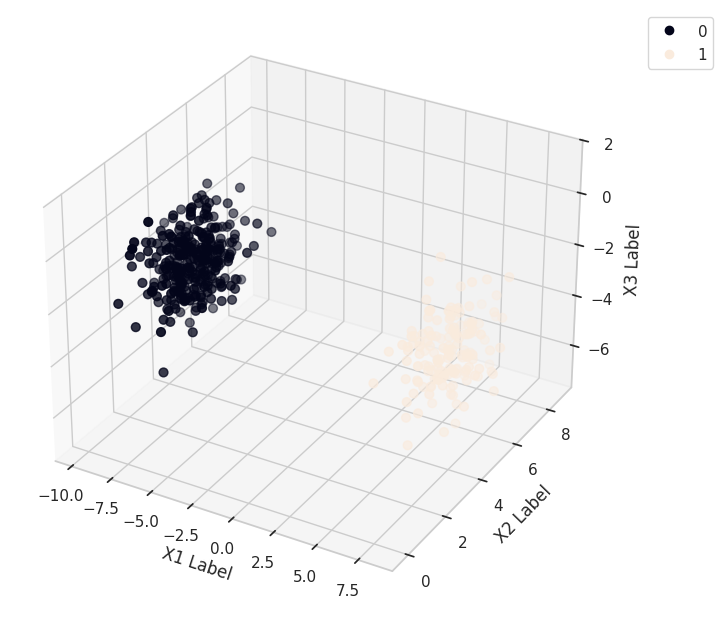

In [16]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(data['x1'], data['x2'], data['x3'], s=40, c=data['y'])
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('X3 Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

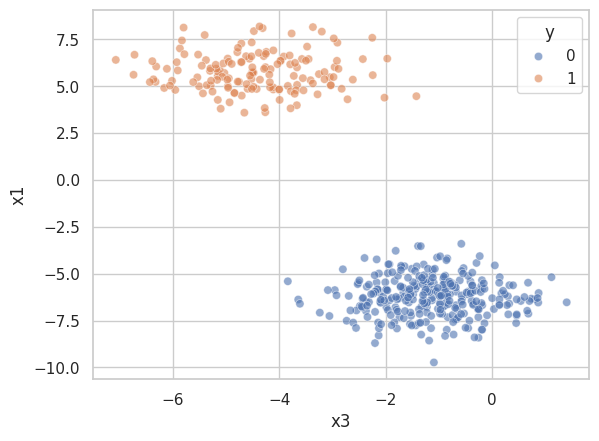

In [17]:
sns.scatterplot(x=data['x3'], y=data['x1'], alpha=0.6, hue=data["y"], palette="deep")
plt.show()

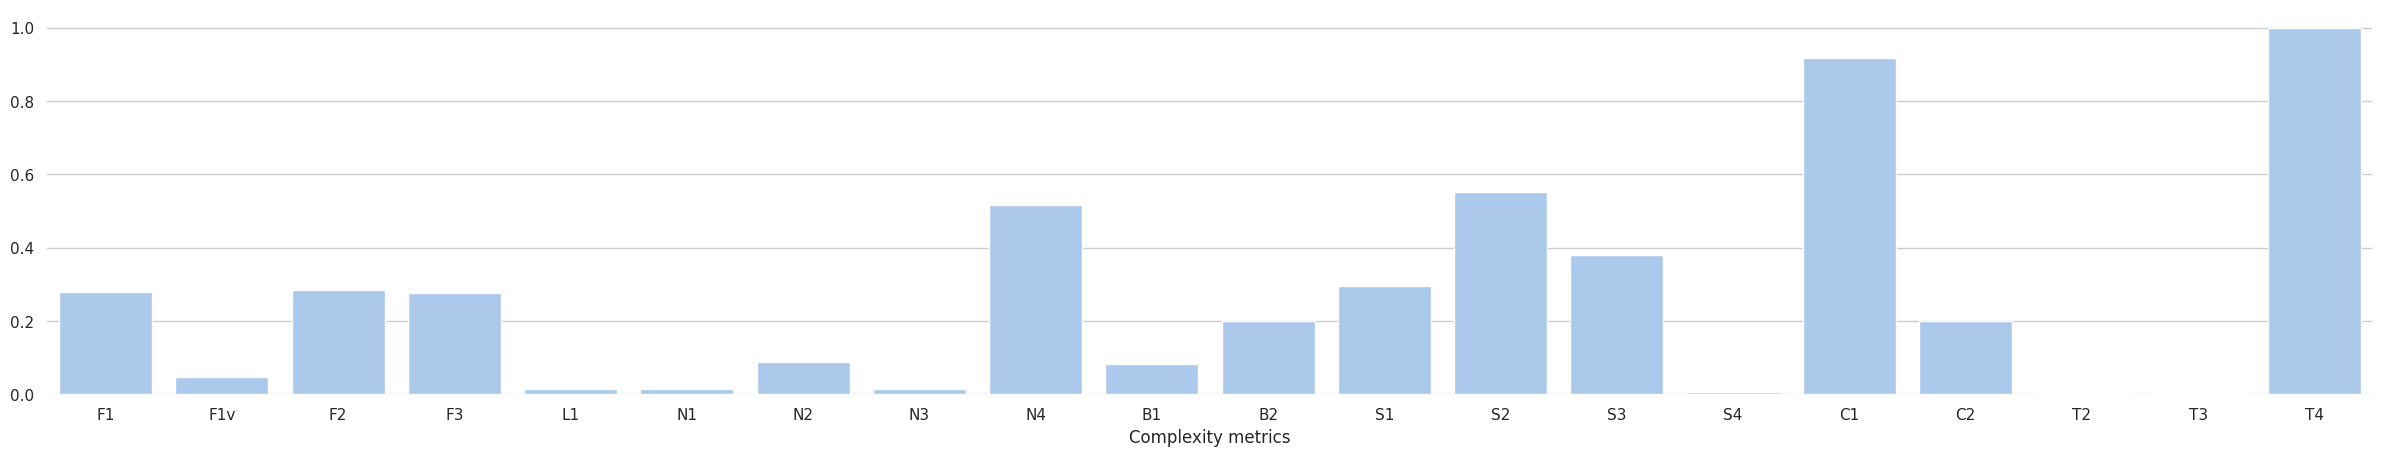

In [18]:
profile = ComplexityProfile()
profile.fit(data[["x2","x3"]],data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

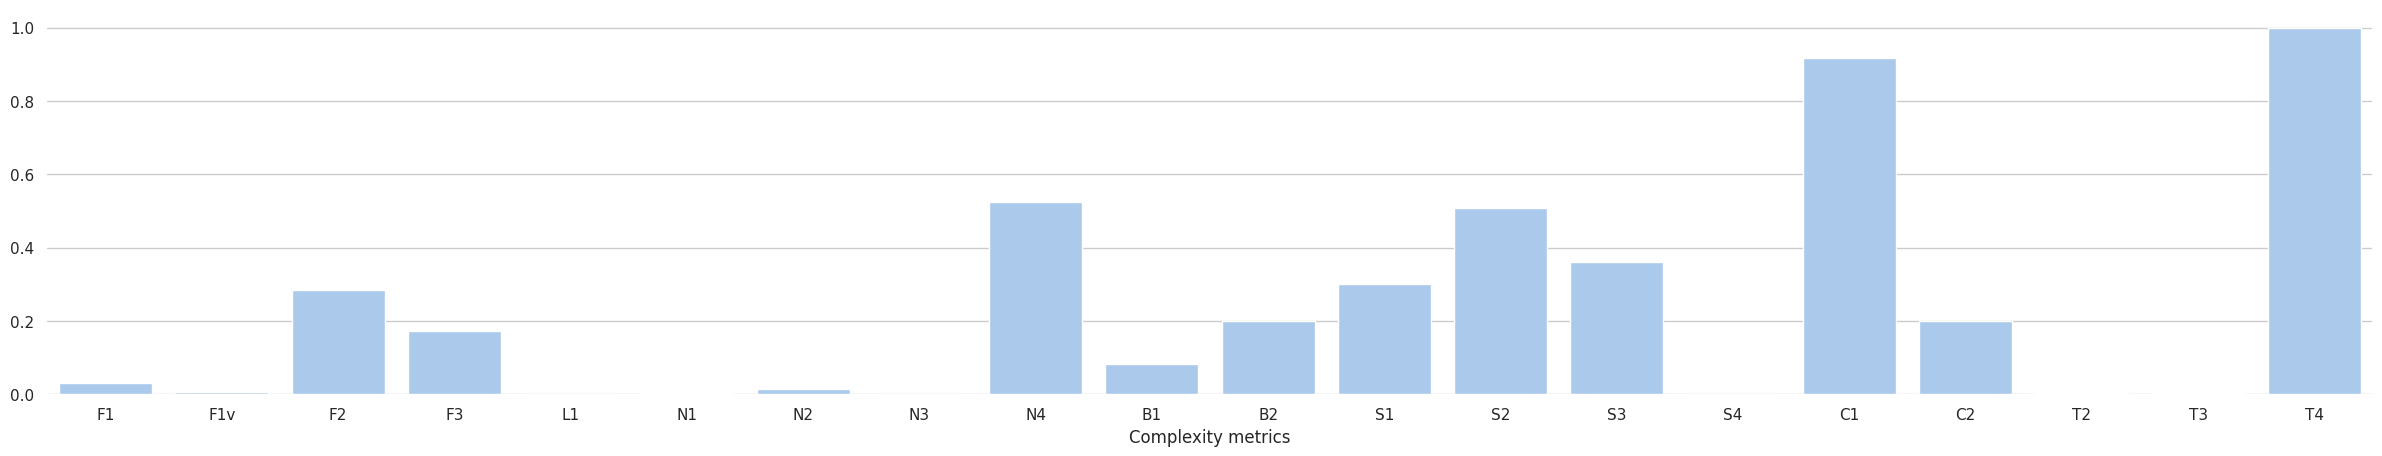

In [19]:
profile = ComplexityProfile()
profile.fit(data[["x1","x3"]],data["y"])
prof_data = profile.transform()
plot_profile(prof_data)

## Random samples

In [20]:
np.random.seed(seed)

y = np.random.binomial(trials, proportion, n_samples)
x1 = np.random.random(n_samples)
x2 = np.random.random(n_samples)
x3 = np.random.random(n_samples)

data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
data

,x1,x2,x3,y
0,0.285878,0.864982,0.893352,0
1,0.986747,0.710271,0.448584,1
2,0.431801,0.170632,0.244384,0
3,0.574234,0.855083,0.814173,1
4,0.527242,0.019857,0.697149,1
...,...,...,...,...
295,0.351571,0.341619,0.108903,0
296,0.442946,0.811299,0.462419,1
297,0.579493,0.872710,0.886352,1
298,0.617561,0.665988,0.464983,1


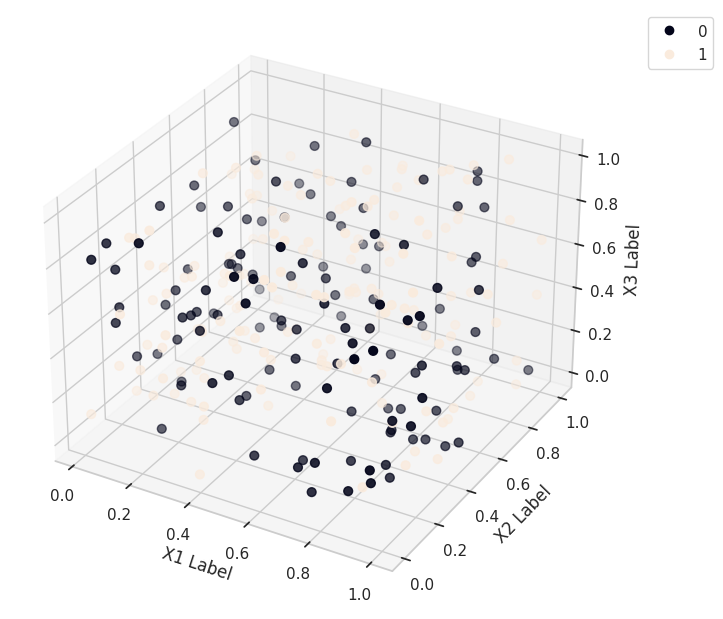

In [21]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(data['x1'], data['x2'], data['x3'], s=40, c=data['y'])
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('X3 Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [22]:
aux = "balanced"
if proportion != 0.5:
    aux = "unbalanced"

data.to_csv(f"../data/random_{n_samples}_{aux}.csv", index=False)

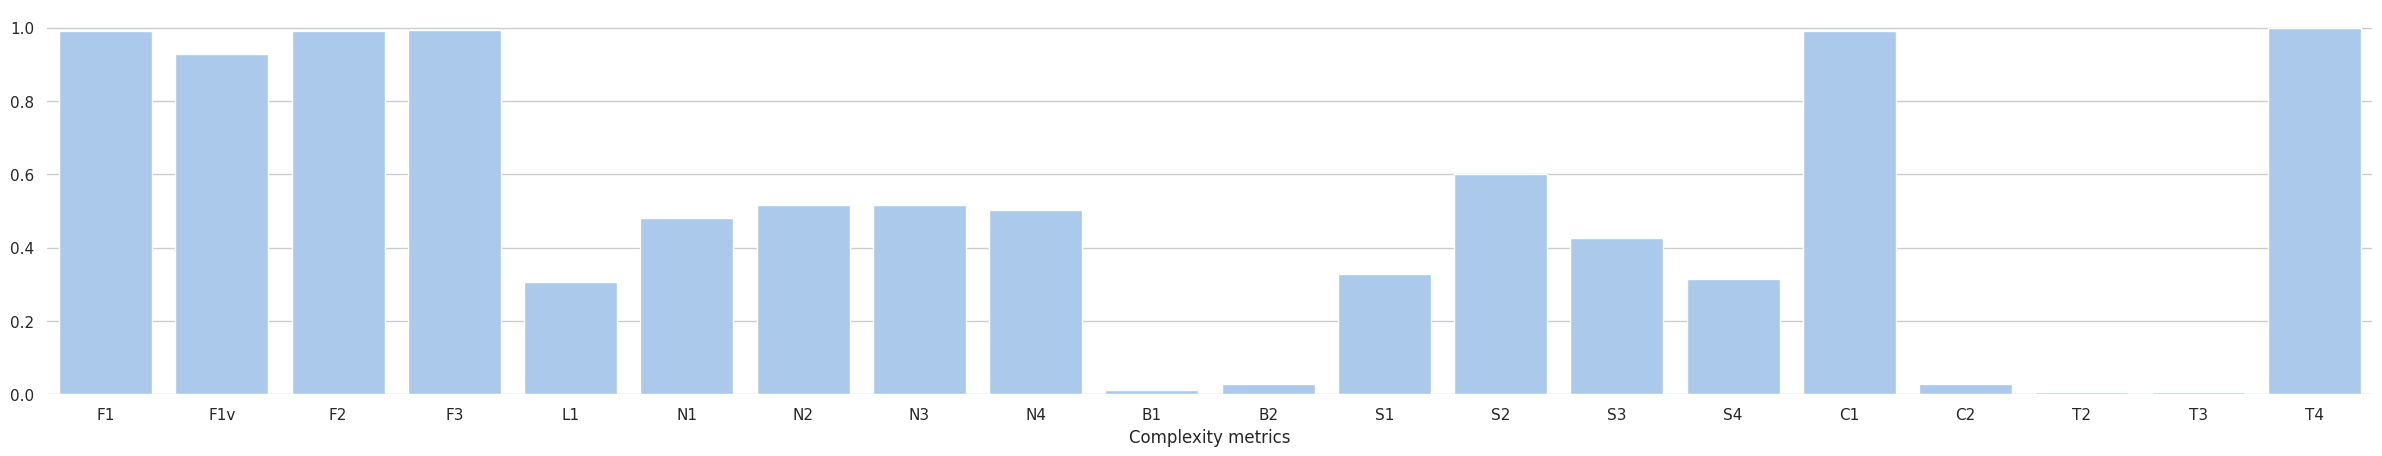

In [23]:
profile = ComplexityProfile()
profile.fit(data[["x2","x3"]],data["y"])
prof_data = profile.transform()
plot_profile(prof_data)